# Ecuador Interactivo

## Alumnos:
* Angel Chuncho
* Eliath Velasco
* Jhoel Narvaez
* Santiago Murillo
* Stalin Yungan

Este modelo de Machine Learning predice la dificultad estimada de la siguiente pregunta a partir de las características del jugador y su desempeño en la ronda anterior.

El objetivo es mantener la experiencia lúdica y motivadora.

## Bibliotecas

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import joblib

## Modelo - Decision Tree


Elección según AI Studio
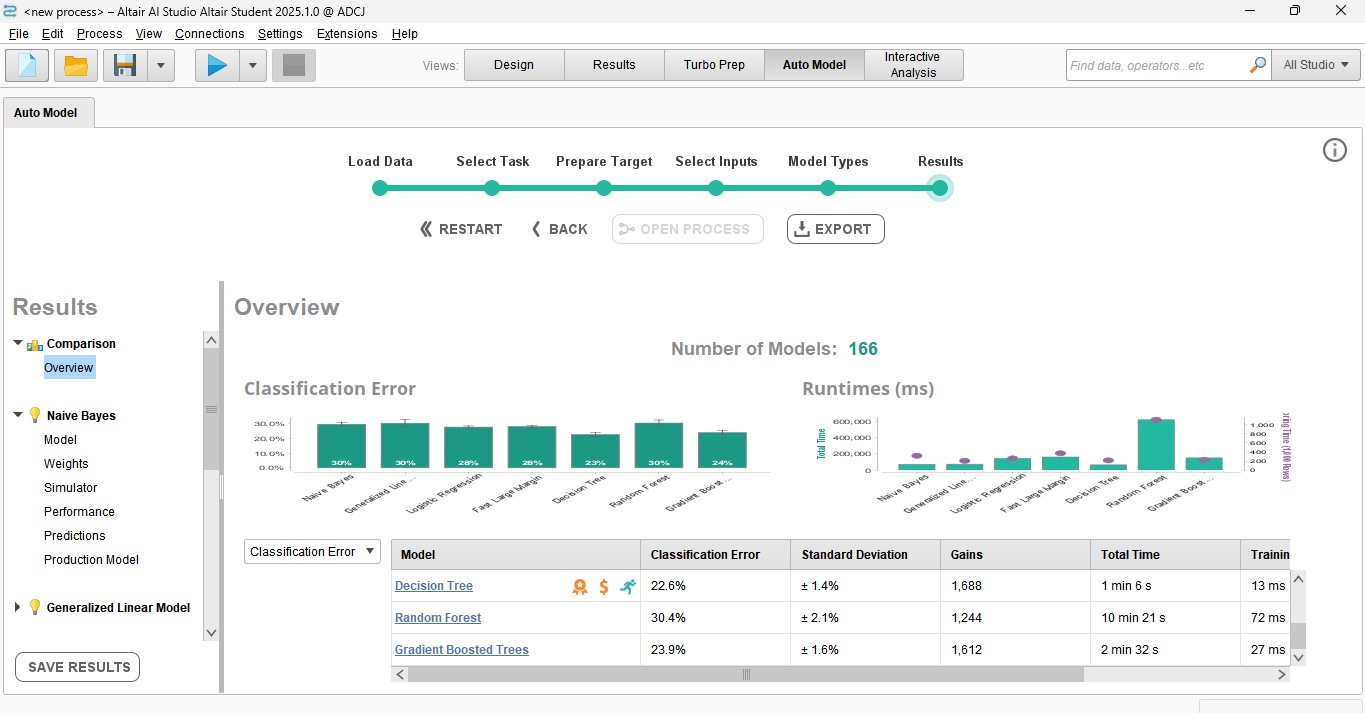

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd

# Cargar dataset
ruta_archivo = "/content/dataset_quizz_educativo.xlsx"
df = pd.read_excel(ruta_archivo)

# Codificar variables categóricas
df_encoded = df.copy()
le_dificultad_pregunta = LabelEncoder()
df_encoded['dificultad_pregunta_anterior'] = le_dificultad_pregunta.fit_transform(df['dificultad_pregunta_anterior'])
df_encoded['dificultad_siguiente_pregunta'] = le_dificultad_pregunta.fit_transform(df['dificultad_siguiente_pregunta'])

# Separar features y etiqueta
X = df_encoded.drop(columns=['dificultad_siguiente_pregunta'])
y = df_encoded['dificultad_siguiente_pregunta']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Reporte de métricas
report = classification_report(y_test, y_pred, target_names=le_dificultad_pregunta.classes_)
conf_matrix = confusion_matrix(y_test, y_pred)

print(report)
print("-----")
conf_matrix


              precision    recall  f1-score   support

        alta       0.72      1.00      0.84       286
        baja       0.70      1.00      0.82       760
       media       1.00      0.54      0.70       954

    accuracy                           0.78      2000
   macro avg       0.81      0.85      0.79      2000
weighted avg       0.85      0.78      0.77      2000

-----


array([[286,   0,   0],
       [  0, 760,   0],
       [113, 326, 515]])

In [ ]:
# Entrada de ejemplo
nueva_entrada = pd.DataFrame([{
    "edad": 3,
    "nro_ronda": 4,
    "vidas_usadas_ronda": 0,
    "racha_aciertos": 1,
    "dificultad_pregunta_anterior": "media",
    "respuesta_correcta": 1,
    "tiempo_respuesta": 30
}])

# Codificar la dificultad anterior igual que en el entrenamiento
nueva_entrada['dificultad_pregunta_anterior'] = le_dificultad_pregunta.transform(
    nueva_entrada['dificultad_pregunta_anterior']
)

# Realizar la predicción
prediccion_codificada = modelo.predict(nueva_entrada)[0]
dificultad_predicha = le_dificultad_pregunta.inverse_transform([prediccion_codificada])[0]

print(f"Dificultad estimada para la siguiente pregunta: {dificultad_predicha}")

Dificultad estimada para la siguiente pregunta: baja


In [ ]:
joblib.dump(modelo, "modelo_dificultad.pkl")
joblib.dump(le_dificultad_pregunta, "encoder_dificultad_pregunta.pkl")

['encoder_dificultad_anterior.pkl']